In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
import sklearn.metrics
%matplotlib inline


In [2]:
x = []
y = []
for i in range(1000):
    x.append(np.random.uniform(1000))
    y.append(6.5 + np.log(x[i]) + 0.5)


In [3]:
z =[]
z = [i ** 2 for i in x]


In [4]:
df = pd.DataFrame(
    {'y': y,
     'x': x,
     'z': z
    })
df.shape
df

,x,y,z
0,564.165908,13.335348,318283.171846
1,746.823373,13.615829,557745.149756
2,200.286980,12.299751,40114.874337
3,281.685413,12.640791,79346.671621
4,518.729593,13.251383,269080.390706
5,245.657258,12.503937,60347.488173
6,271.318067,12.603292,73613.493714
7,592.122142,13.383713,350608.631156
8,49.357676,10.899093,2436.180199
9,903.286090,13.806039,815925.760480


In [5]:
y = np.array(df.y)
X = np.array(df.z)

mod = smf.OLS(y, X)
fit = mod.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1487.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          5.55e-200
Time:                        11:34:29   Log-Likelihood:                -3520.6
No. Observations:                1000   AIC:                             7043.
Df Residuals:                     999   BIC:                             7048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          2.278e-05   5.91e-07     38.562      0.000      2.16e-05  2.39e-05
==============================================================================
Omnibus:                      122.390   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.933
Skew:                          -0.834   Prob(JB):                     3.70e-29
Kurtosis:                       2.397   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
l = []
l = [np.log(i) for i in x]
df.l  = l

In [7]:
X = df.l
y = df.y
mod = sm.OLS(y, X)
fit = mod.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.092e+05
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        11:34:38   Log-Likelihood:                -1624.6
No. Observations:                1000   AIC:                             3251.
Df Residuals:                     999   BIC:                             3256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1576      0.007    330.493      0.000         2.145     2.170
==============================================================================
Omnibus:                      402.260   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1580.171
Skew:                           1.922   Prob(JB):                         0.00
Kurtosis:                       7.812   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X = pd.concat([df.x, df.z], axis =1)
y = df.y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = sm.OLS(y_train, X_train) 
fit = model.fit()
y_pred = fit.predict(X_test)
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     4344.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        11:39:39   Log-Likelihood:                -1874.7
No. Observations:                 700   AIC:                             3753.
Df Residuals:                     698   BIC:                             3763.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.0508      0.001     55.503      0.000         0.049     0.053
z          -4.104e-05    1.2e-06    -34.223      0.000     -4.34e-05 -3.87e-05
==============================================================================
Omnibus:                       78.333   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.229
Skew:                           0.942   Prob(JB):                     2.33e-23
Kurtosis:                       2.857   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
err = sklearn.metrics.mean_squared_error(y_test, y_pred)
err

15.019630823947269

In [36]:
X = pd.concat([df.x], axis =1)
y = df.y

In [37]:

d =[3977, 3575, 2670, 3014, 3336, 3771, 4444]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = sm.OLS(y_train, X_train) 
fit = model.fit()
y_pred = fit.predict(X_test)
y_p = fit.predict(X_train)

a.append(sklearn.metrics.mean_squared_error(y_test, y_pred))
b.append(sklearn.metrics.mean_squared_error(y_train, y_p))
c.append(sklearn.metrics.r2_score(y_test, y_pred))
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     2808.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          5.27e-247
Time:                        13:07:14   Log-Likelihood:                -2220.9
No. Observations:                 700   AIC:                             4444.
Df Residuals:                     699   BIC:                             4448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.0203      0.000     52.990      0.000         0.020     0.021
==============================================================================
Omnibus:                      750.427   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.198
Skew:                          -0.217   Prob(JB):                     7.63e-12
Kurtosis:                       1.748   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
d =[3977, 3575, 2670, 3014, 3336, 3771, 4444]

In [45]:
n = [7,6,5,4,3,2,1]

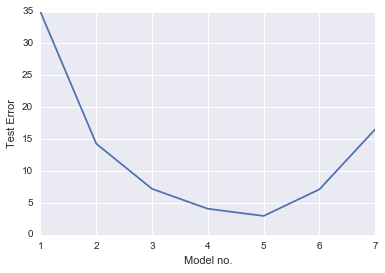

In [47]:
plt.plot(n, a)
plt.xlabel('Model no.')
plt.ylabel('Test Error')



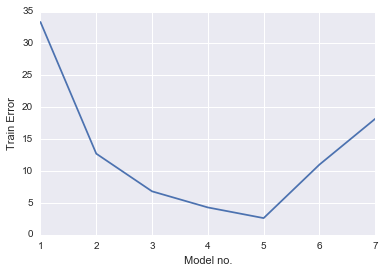

In [49]:
plt.plot(n, b)
plt.xlabel('Model no.')
plt.ylabel('Train Error')

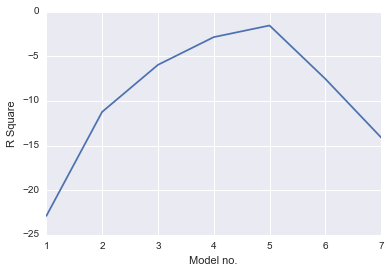

In [51]:
plt.plot(n, c)
plt.xlabel('Model no.')
plt.ylabel('R Square')

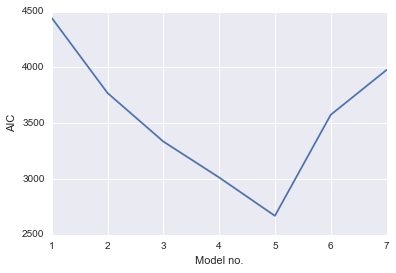

In [52]:
plt.plot(n, d)
plt.xlabel('Model no.')
plt.ylabel('AIC')

In [70]:
dl = df[:1000]


In [71]:

X = pd.concat([dl.x, dl.z], axis =1)
y = dl.y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = sm.OLS(y_train, X_train) 
fit = model.fit()
y_pred = fit.predict(X_test)
y_p = fit.predict(X_train)
a.append(sklearn.metrics.mean_squared_error(y_test, y_pred))
b.append(sklearn.metrics.mean_squared_error(y_train, y_p))
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     4355.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        13:22:28   Log-Likelihood:                -1873.9
No. Observations:                 700   AIC:                             3752.
Df Residuals:                     698   BIC:                             3761.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.0507      0.001     55.540      0.000         0.049     0.052
z          -4.082e-05   1.19e-06    -34.216      0.000     -4.32e-05 -3.85e-05
==============================================================================
Omnibus:                       74.174   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.565
Skew:                           0.896   Prob(JB):                     1.77e-21
Kurtosis:                       2.739   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
b

[0.12112019174054593,
 11.68197178826772,
 9.0587710805465544,
 13.87557885972257,
 13.06059229355151,
 12.228984544616244,
 11.88204290276189,
 12.66411798801184,
 12.379228848354941]

In [74]:
n = [5,10,20,50,100,200,500,750,1000]

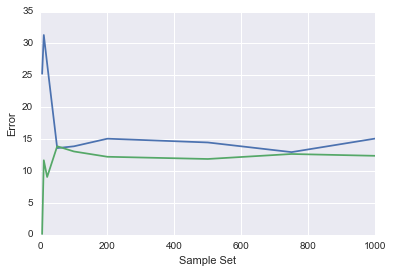

In [79]:
plt.plot(n,a)#blue test error
plt.plot(n,b)#green train error
plt.xlabel('Sample Set')
plt.ylabel('Error')